# Asi

Olgu $A$ ja $B$ mudelid ning nende ennustused märgendi $y_i$ puhul vastavalt $\hat{y}_i$ ja $\hat{z}_i$

$\dots$

\begin{align*}
    \Delta & := p_A - p_B \\
           & = \frac{ 1 }{ n } \sum_{ i = 1 }^{ n } [\hat{y}_i = y_i] - \frac{ 1 }{ n } \sum_{ i = 1 }^{ n } [\hat{z}_i = y_i] \\
           & = \frac{ 1 }{ n } \sum_{ \hat{y}_i \neq \hat{z}_i } [\hat{y}_i = y_i] - [\hat{z}_i = y_i] \\
           & = \frac{ k }{ n } \frac{ 1 }{ k } \sum_{ \hat{y}_i \neq \hat{z}_i } [\hat{y}_i = y_i] - [\hat{z}_i = y_i] \\
\end{align*}

millest $\frac{ 1 }{ k } \sum_{ \hat{y}_i \neq \hat{z}_i } [\hat{y}_i = y_i] - [\hat{z}_i = y_i] =: \delta$

### Höffding

Olgu $-1 \leq X_i \leq 1$ ja $S_n = \sum_{i=1}^{n} X_i$

\begin{equation*}
    P ( \mid \frac{ S_n }{ n } - \frac{ ES_n }{ n } \mid \geq \frac{c}{n} ) \leq 2 \exp{ \left( - \frac{ c^2 }{ 2 n } \right) }
\end{equation*}

$\alpha \in [0, 1]$, siis Höffdingi võrratusest

\begin{equation*}
     \varepsilon := \frac{c}{n} = \sqrt{ - \frac{2}{n} \ln{ \left( \frac{ 1 - \alpha }{2} \right) } }
\end{equation*}

### Höffding

\begin{equation*}
    P ( \mid \delta - \Delta \mid \geq \frac{c}{k} ) \leq 2 \exp{ \left( - \frac{ c^2 }{ 2 k } \right) }
\end{equation*}

[//]:\begin{equation*}
[//]:    P ( \mid \frac{ S_n }{ n } - \frac{ ES_n }{ n } \mid \geq \frac{c}{n} ) \leq 2 \exp{ \left( - \frac{ c^2 }{ 2 n } \right) }
[//]:\end{equation*}

$\alpha \in [0, 1]$

\begin{equation*}
     \varepsilon := \frac{c}{k} = \sqrt{ - \frac{2}{k} \ln{ \left( \frac{ 1 - \alpha }{2} \right) } }
\end{equation*}

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

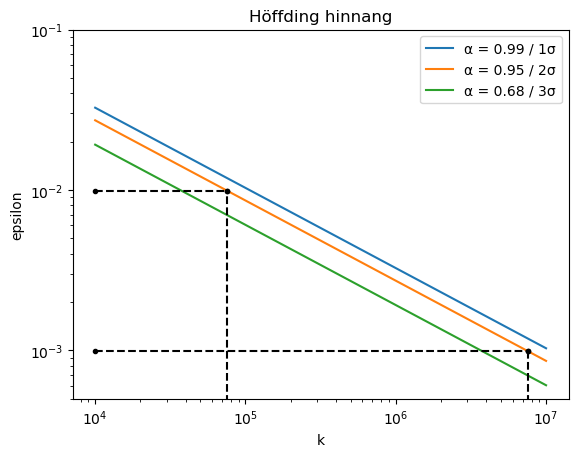

In [12]:
k = np.logspace(4, 7, num=100)
alpha = np.array([0.99, 0.95, 0.68])
epsilon_höffding = np.array([np.sqrt(- np.log((1 - a) / 2) * (2 / k)) for a in alpha])

for e in epsilon_höffding:
    plt.plot(k, e)

# epsilon = 1%
i = np.argmin(np.abs(epsilon_höffding[1] - 0.01))
plt.plot([k[0], k[i]], [epsilon_höffding[1][i], epsilon_höffding[1][i]], '.k--')
plt.plot([k[i], k[i]], [0, epsilon_höffding[1][i]], '.k--')

# epsilon = 0.1%
i = np.argmin(np.abs(epsilon_höffding[1] - 0.001))
plt.plot([k[0], k[i]], [epsilon_höffding[1][i], epsilon_höffding[1][i]], '.k--')
plt.plot([k[i], k[i]], [0, epsilon_höffding[1][i]], '.k--')

plt.title('Höffding hinnang')

plt.legend([f'α = {a} / {i + 1}σ' for i, a in enumerate(alpha)])

plt.xlabel('k')
plt.xscale('log')
plt.xticks(np.logspace(4, 7, num=4))

plt.ylabel('epsilon')
plt.yscale('log')
plt.yticks(np.logspace(-3, -1, num=3))

plt.show()

# TODO tabel/dataframe

### Binoom

Kuna $X_i \in \{ -1 , 1 \}$ defineerime sellise $Y_i \in \{ 0 , 1 \}$ järgnevalt $Y_i = \frac{ X_i + 1 }{ 2 }$, siis $\sum_{i = 1}^{k} Y_i =: S_k \sim Bin(k, p_A (1 - p_B) )$

$\dots$

$\alpha = 0.95$

$\dots$

\begin{equation*}
    \varepsilon = p_A ( 1 - p_B ) - \frac{ q_{0.025} }{ k }
\end{equation*}

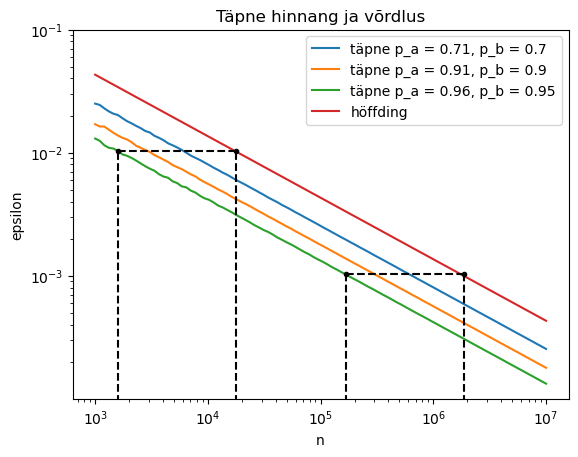

In [10]:
k = np.logspace(3, 7, num=100)
tõenäosused_a = np.array([0.71, 0.91, 0.96])
tõenäosused_b = np.array([0.7, 0.9, 0.95])

epsilon_binoom = np.array(
    [p_a * (1 - p_b) - binom.ppf(q=0.025, p=p_a * (1 - p_b), n=k) / k for p_a, p_b  in zip(tõenäosused_a, tõenäosused_b)]
)
epsilon_höffding = np.sqrt(- np.log(0.025) / (2 * k))

for e in epsilon_binoom:
    plt.plot(k, e)

plt.plot(k, epsilon_höffding)

# epsilon = 1%
i_binoom = np.argmin(np.abs(epsilon_binoom[2] - 0.01))
i_höffding = np.argmin(np.abs(epsilon_höffding - 0.01))

plt.plot([k[i_binoom], k[i_höffding]], [epsilon_binoom[2][i_binoom], epsilon_binoom[2][i_binoom]], '.k--')
plt.plot([k[i_binoom], k[i_binoom]], [0, epsilon_binoom[2][i_binoom]], 'k--')
plt.plot([k[i_höffding], k[i_höffding]], [0, epsilon_binoom[2][i_binoom]], 'k--')

# epsilon = 0.1%
i_binoom = np.argmin(np.abs(epsilon_binoom[2] - 0.001))
i_höffding = np.argmin(np.abs(epsilon_höffding - 0.001))

plt.plot([n[i_binoom], n[i_höffding]], [epsilon_binoom[2][i_binoom], epsilon_binoom[2][i_binoom]], '.k--')
plt.plot([n[i_binoom], n[i_binoom]], [0, epsilon_binoom[2][i_binoom]], 'k--')
plt.plot([n[i_höffding], n[i_höffding]], [0, epsilon_binoom[2][i_binoom]], 'k--')


plt.title('Binoom hinnang ja võrdlus')

plt.legend([f'täpne p_a = {p_a}, p_b = {p_b}' for p_a, p_b  in zip(tõenäosused_a, tõenäosused_b)] + ['höffding'])

plt.xlabel('n')
plt.xscale('log')
plt.xticks(np.logspace(3, 7, num=5))

plt.ylabel('epsilon')
plt.yscale('log')
plt.yticks(np.logspace(-3, -1, num=3))

plt.show()

# TODO tabel/dataframe